<a href="https://colab.research.google.com/github/AdhavanHero/Python-Machine-Learning/blob/main/Random%20Forest/GoldPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goldprice prediction

In [14]:
import pandas as pd                       
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
from google.colab import files
uploaded = files.upload()

Saving gld_price_data.xls to gld_price_data (3).xls


In [15]:
import io
df = pd.read_csv(io.BytesIO(uploaded["gld_price_data.xls"]))
df


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [16]:
df.head()             


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [17]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [18]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
df.isnull().sum()                 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
X=df.drop(['Date','GLD'],axis='columns')      

In [22]:
Y=df['GLD']
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split           
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [24]:
len(X_train)


1603

In [25]:
len(X_test)

687

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model=RandomForestRegressor()

In [28]:
model.fit(X_train,Y_train) 

RandomForestRegressor()

In [29]:
test_prediction=model.predict(X_test)       

In [30]:
Y_test=list(Y_test) 

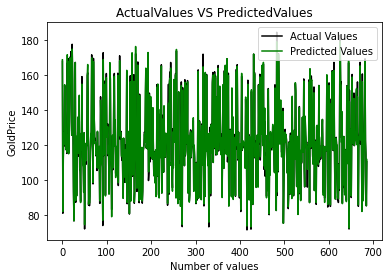

In [31]:
plt.title("ActualValues VS PredictedValues")            
plt.plot(Y_test,color='black',label='Actual Values')
plt.plot(test_prediction,color='green',label='Predicted Values')
plt.xlabel("Number of values")
plt.ylabel("GoldPrice")
plt.legend()
plt.show()

In [32]:
Models_Accuracy=model.score(X_test,Y_test)     
Models_Accuracy

0.9900224462502869